In [26]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from scatseisnet import ScatteringNetwork

%config InlineBackend.figure_format = "svg"

# 

import pickle
import matplotlib.dates as mdates

from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA,PCA

plt.rcParams["date.converter"] = "concise"
%config InlineBackend.figure_format = "svg"
#scattering_coefficients11H44-49 scattering_coefficients11H44-29
# Load data from file
with np.load("scattering_coefficients11H-49.npz", allow_pickle=True) as data:
    order_1 = data["order_1"]
    order_2 = data["order_2"]
    times = data["times"]

# Reshape and stack scattering coefficients of all orders
order_1 = order_1.reshape(order_1.shape[0], -1)
order_2 = order_2.reshape(order_2.shape[0], -1)
scattering_coefficients = np.hstack((order_1, order_2))

# transform into log
scattering_coefficients = np.log(scattering_coefficients)

# print info about shape
n_times, n_coeff = scattering_coefficients.shape
print("Collected {} samples of {} dimensions each.".format(n_times, n_coeff))

Collected 450 samples of 728 dimensions each.


In [46]:
model1 = FastICA(n_components=6, whiten="unit-variance", random_state=42)
ica_features = model1.fit_transform(scattering_coefficients)

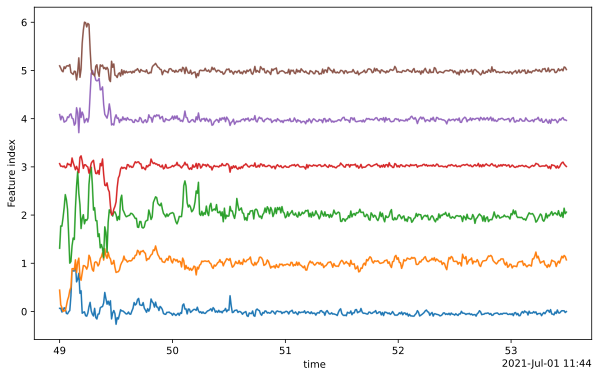

In [47]:
# Normalize the transformed features for display
features_test_normalized = ica_features / np.abs(ica_features).max(axis=0)

# Figure instance
fig = plt.figure(figsize=(10, 6), dpi=200)
ax = plt.axes()

# Plot features
ax.plot(times, features_test_normalized + np.arange(ica_features.shape[1]), rasterized=True)

# Labels
ax.set_ylabel("Feature index")
ax.set_xlabel(" time")

# Show
plt.show()


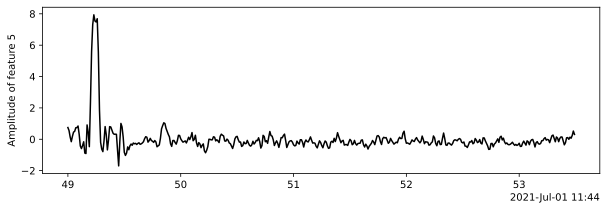

In [49]:
# Pick a feature
from scipy.ndimage import uniform_filter1d
from scipy.signal import find_peaks
# Apply a smoothing filter using a window size of 5 for the moving average
feature_id = 5
smoothed_features = uniform_filter1d(ica_features[:, feature_id], size=2)

fig = plt.figure(figsize=(10,3))
ax = plt.axes()
ax.plot(times, smoothed_features, color='black')
ax.set_ylabel(f"Amplitude of feature {feature_id}")

# Show
plt.show()

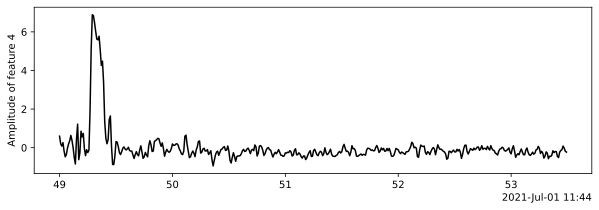

In [50]:
# Pick a feature
from scipy.ndimage import uniform_filter1d
from scipy.signal import find_peaks
feature_id = 4
smoothed_featurs = uniform_filter1d(ica_features[:, feature_id], size=2)

fig = plt.figure(figsize=(10,3))
ax = plt.axes()
ax.plot(times, smoothed_featurs, color='black')
ax.set_ylabel(f"Amplitude of feature {feature_id}")

# Show
plt.show()

In [ ]:
# Pick a feature
from scipy.ndimage import uniform_filter1d
from scipy.signal import find_peaks
feature_id = 7
smoothed_featurs = uniform_filter1d(ica_features[:, feature_id], size=2)

fig = plt.figure(figsize=(10,3))
ax = plt.axes()
ax.plot(times, smoothed_featurs, color='black')
ax.set_ylabel(f"Amplitude of feature {feature_id}")

# Show
plt.show()

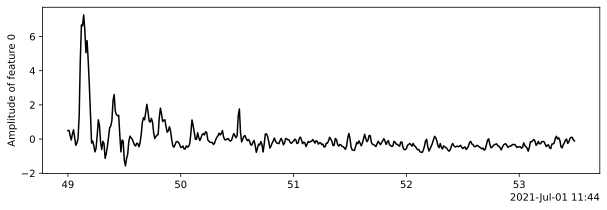

In [51]:
# Pick a feature
from scipy.ndimage import uniform_filter1d
from scipy.signal import find_peaks
# Apply a smoothing filter using a window size of 5 for the moving average
feature_id = 0
smoothed_feature = uniform_filter1d(ica_features[:, feature_id], size=2)

fig = plt.figure(figsize=(10,3))
ax = plt.axes()
ax.plot(times, smoothed_feature, color='black')
ax.set_ylabel(f"Amplitude of feature {feature_id}")

# Show
plt.show()

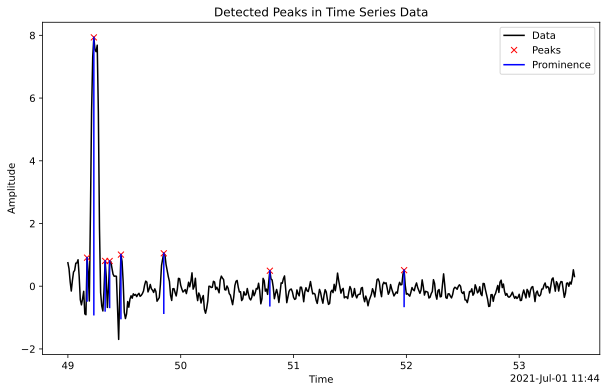

['2021-07-01 11:44:49.170',
 '2021-07-01 11:44:49.230',
 '2021-07-01 11:44:49.330',
 '2021-07-01 11:44:49.370',
 '2021-07-01 11:44:49.470',
 '2021-07-01 11:44:49.850',
 '2021-07-01 11:44:50.790',
 '2021-07-01 11:44:51.980']

In [57]:
from scipy.ndimage import uniform_filter1d
from scipy.signal import find_peaks



def detect_and_plot_peaks(data, times, prominence=0.1, width=None, distance=None):
    
    from scipy.signal import find_peaks
    import matplotlib.pyplot as plt
    
    # Detect peaks
    peaks, properties = find_peaks(data, prominence=prominence, width=width, distance=distance)
    
    # Extract the peak times
    peak_times = times[peaks]
    peak_times_str = [t.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3] for t in peak_times]
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(times, data, label='Data', color='black')
    ax.plot(peak_times, data[peaks], "x", label='Peaks', color='red')
    
    # Marking the prominence on the graph
    prominences = properties['prominences']
    for i, peak in enumerate(peaks):
        ax.plot([times[peak], times[peak]], [data[peak] - prominences[i], data[peak]], color='blue', label='Prominence' if i == 0 else "")
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title('Detected Peaks in Time Series Data')
    ax.legend()
    
    # Return the peak times and the plot figure
    return peak_times_str, fig



peak_times_str_dynamic, fig = detect_and_plot_peaks(smoothed_features, times, prominence=1)
plt.show()
peak_times_str_dynamic

In [58]:
import pandas as pd

file_path = 'bubble_summary.csv'
data = pd.read_csv(file_path)


data = data['Month,Date,Hour,Minute,Second,Milisec,Sampling_rate,Subsection'].str.split(',', expand=True)
data.columns = ['Month', 'Date', 'Hour', 'Minute', 'Second', 'Milisec', 'Sampling_rate', 'Subsection']

# Convert the relevant columns to integers to facilitate filtering
data[['Month', 'Date', 'Hour', 'Minute', 'Second']] = data[['Month', 'Date', 'Hour', 'Minute', 'Second']].apply(pd.to_numeric)

# Filter the data for the specified date and time
filtered_data = data[(data['Date'] == 1) & (data['Month'] == 7) & (data['Hour'] == 11) & (data['Minute'] == 44) & (data['Second'] >= 48) & (data['Second'] <= 60)]

filtered_data


,Month,Date,Hour,Minute,Second,Milisec,Sampling_rate,Subsection
98934,7,1,11,44,48,832,8000,ch130_170
98935,7,1,11,44,49,397,8000,ch130_170
98936,7,1,11,44,49,592,8000,ch130_170
98937,7,1,11,44,51,74,8000,ch130_170
98938,7,1,11,44,51,176,8000,ch130_170
98939,7,1,11,44,51,614,8000,ch130_170
98940,7,1,11,44,52,161,8000,ch130_170
98941,7,1,11,44,52,838,8000,ch130_170
98942,7,1,11,44,53,721,8000,ch130_170
98943,7,1,11,44,54,35,8000,ch130_170


In [59]:
def match_with_tolerance(data_df, peak_times, tolerance_ms=30, year=2021):
   
    from pandas import Timedelta
    
    # Ensure DateTime column is correctly formatted
    df = data_df.copy()
    df['DateTime'] = pd.to_datetime(df[['Month', 'Date', 'Hour', 'Minute', 'Second', 'Milisec']].astype(str).agg('-'.join, axis=1), errors='coerce', format='%m-%d-%H-%M-%S-%f')
    df['DateTime'] = df['DateTime'].apply(lambda x: x.replace(year=year))

    # Initialize an empty DataFrame to hold all matches
    all_matches = pd.DataFrame()

    # Check each peak time against the data within the tolerance window
    for peak_time in peak_times:
        lower_bound = peak_time - Timedelta(milliseconds=tolerance_ms)
        upper_bound = peak_time + Timedelta(milliseconds=tolerance_ms)
        matches = df[(df['DateTime'] >= lower_bound) & (df['DateTime'] <= upper_bound)]
        all_matches = pd.concat([all_matches, matches])

    return all_matches
    
import pandas as pd
from pandas import Timedelta

peak_times_dt = pd.to_datetime(peak_times_str_dynamic)

matches_with_tolerance = match_with_tolerance(filtered_data, peak_times_dt, tolerance_ms=100)
print(matches_with_tolerance)



       Month  Date  Hour  Minute  Second Milisec Sampling_rate Subsection  \
98935      7     1    11      44      49     397          8000  ch130_170   
98935      7     1    11      44      49     397          8000  ch130_170   
98935      7     1    11      44      49     397          8000  ch130_170   

                     DateTime  
98935 2021-07-01 11:44:49.397  
98935 2021-07-01 11:44:49.397  
98935 2021-07-01 11:44:49.397  


In [55]:
model2 = FastICA(n_components=12, whiten="unit-variance", random_state=42)
ica_feature = model2.fit_transform(scattering_coefficients)

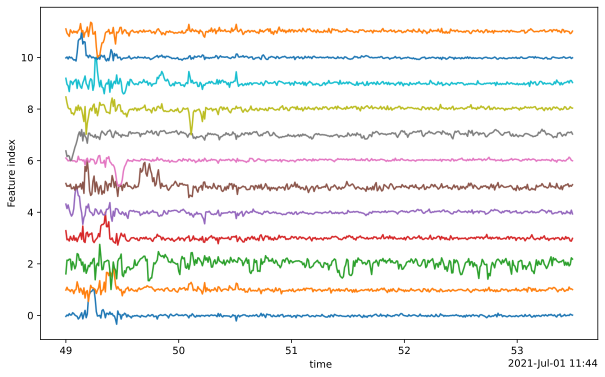

In [56]:
# Normalize the transformed features for display
features_test_normalized = ica_feature / np.abs(ica_feature).max(axis=0)

# Figure instance
fig = plt.figure(figsize=(10, 6), dpi=200)
ax = plt.axes()

# Plot features
ax.plot(times, features_test_normalized + np.arange(ica_feature.shape[1]), rasterized=True)

# Labels
ax.set_ylabel("Feature index")
ax.set_xlabel(" time")

# Show
plt.show()
